In [30]:
import cv2
import numpy as np
import math

In [23]:
# 读取RGB图像
img = cv2.imread('./image1.bmp')

In [24]:
# 初始化一个空的HSI图像
hsi_img = np.zeros_like(img)

In [25]:
# 对每个像素进行处理
for x in range(img.shape[0]):
    for y in range(img.shape[1]):
        # 获取当前像素的RGB值
        b, g, r = img[x, y]

        # 计算色相值
        numerator = 0.5 * ((r - g) + (r - b))
        denominator = np.sqrt((r - g) ** 2 + (r - b) * (g - b))
        hue = np.arccos(numerator / denominator)
        h = hue * 180 / np.pi

        # 计算饱和度值
        min_val = np.min([r, g, b])
        saturation = 1 - (3.0 / (r + g + b)) * min_val
        s = saturation

        # 计算亮度值
        intensity = (r + g + b) / 3.0
        i = intensity

        # 将HSI值设置为当前像素的值
        hsi_img[x, y] = [h, s * 255, i]

/Users/mountaintop/opt/anaconda3/envs/NUS_CV/lib/python3.7/site-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in ubyte_scalars
  
/Users/mountaintop/opt/anaconda3/envs/NUS_CV/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: overflow encountered in ubyte_scalars
  if __name__ == "__main__":


In [26]:
hsi_img.shape

(500, 500, 3)

In [44]:
# 将HSI图像拆分成单独的通道
H_channel, S_channel, I_channel = cv2.split(hsi_img)

In [27]:
# 创建25x25的算术平均掩模
mask = np.ones((25, 25), dtype=np.float32) / 625.0

In [37]:
# 定义卷积函数
def convolution(image, kernel):
    m, n = kernel.shape
    if (m == n):
        y, x = image.shape
        # 表示卷积操作的次数
        y = y - m + 1
        x = x - n + 1
        #创建一个新图像空间
        new_image = np.zeros((y,x))
        #开始卷积
        for i in range(y):
            for j in range(x):
                new_image[i][j] = np.sum(image[i:i+m, j:j+m]*kernel)
    return new_image

In [50]:
# 将掩膜应用于图像
H_channel = convolution(H_channel, mask).astype(np.uint8)
H_channel

array([[59, 59, 59, ..., 60, 60, 60],
       [58, 58, 58, ..., 60, 60, 60],
       [58, 58, 58, ..., 60, 60, 60],
       ...,
       [58, 58, 58, ..., 58, 58, 58],
       [58, 58, 58, ..., 58, 58, 58],
       [58, 58, 58, ..., 58, 58, 58]], dtype=uint8)

In [51]:
hsi_img = cv2.merge((H_channel, S_channel, I_channel))

error: OpenCV(4.7.0) /Users/runner/work/opencv-python/opencv-python/opencv/modules/core/src/merge.dispatch.cpp:129: error: (-215:Assertion failed) mv[i].size == mv[0].size && mv[i].depth() == depth in function 'merge'


In [31]:
# 分离色调、饱和度和亮度分量
hue, saturation, intensity = cv2.split(img)

# 将色调从度数转换为弧度
hue = hue / 255.0 * 2 * math.pi

# 计算RGB值
red = np.zeros_like(hue)
green = np.zeros_like(hue)
blue = np.zeros_like(hue)

# RG sector (0 <= H < 2*pi/3)
idx = np.logical_and(hue >= 0, hue < 2 * math.pi / 3)
blue[idx] = intensity[idx] * (1 - saturation[idx])
red[idx] = intensity[idx] * (1 + saturation[idx] * np.cos(hue[idx]) / np.cos(math.pi / 3 - hue[idx]))
green[idx] = 3 * intensity[idx] - (red[idx] + blue[idx])

In [32]:
# GB sector (2*pi/3 <= H < 4*pi/3)
idx = np.logical_and(hue >= 2 * math.pi / 3, hue < 4 * math.pi / 3)
red[idx] = intensity[idx] * (1 - saturation[idx])
green[idx] = intensity[idx] * (1 + saturation[idx] * np.cos(hue[idx] - 2 * math.pi / 3) / np.cos(math.pi - hue[idx]))
blue[idx] = 3 * intensity[idx] - (red[idx] + green[idx])

# BR sector (4*pi/3 <= H < 2*pi)
idx = np.logical_and(hue >= 4 * math.pi / 3, hue < 2 * math.pi)
green[idx] = intensity[idx] * (1 - saturation[idx])
blue[idx] = intensity[idx] * (1 + saturation[idx] * np.cos(hue[idx] - 4 * math.pi / 3) / np.cos(5 * math.pi / 3 - hue[idx]))
red[idx] = 3 * intensity[idx] - (green[idx] + blue[idx])

# 将RGB值限制在0到255的范围内
red = np.clip(red, 0, 255)
green = np.clip(green, 0, 255)
blue = np.clip(blue, 0, 255)

In [33]:
# 将RGB值转换为无符号8位整数类型
rgb_img = cv2.merge((blue.astype(np.uint8), green.astype(np.uint8), red.astype(np.uint8)))

In [35]:
import matplotlib.pyplot as plt

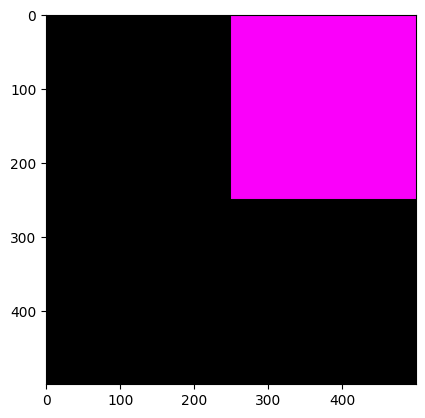

In [36]:
plt.imshow(rgb_img)